<a href="https://colab.research.google.com/github/TinaKristina/corruption/blob/main/corruption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Corruption:

Which country has the worst CPI? Why? 
Does that influence on happiness rank some country?

***CPI - CORRUPTION PERCEPTIONS INDEX 

https://www.kaggle.com/jeegarmaru/corruption-perceptions-index-for-10-years ***DS
https://www.kaggle.com/transparencyint/corruption-index
https://data.world/datasets/corruption

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np  # linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns #plotting data
%matplotlib inline

In [ ]:
cor15 = pd.read_csv('/content/drive/My Drive/corruption_data_10-19/CPI_2015_final_dataset.csv')
cor16 = pd.read_csv('/content/drive/My Drive/corruption_data_10-19/CPI_2016_final_dataset.csv')
cor17 = pd.read_csv('/content/drive/My Drive/corruption_data_10-19/CPI_2017_final_dataset.csv')
cor18 = pd.read_csv('/content/drive/My Drive/corruption_data_10-19/CPI_2018_final_dataset.csv')
cor19 = pd.read_csv('/content/drive/My Drive/corruption_data_10-19/CPI_2019_final_dataset.csv')


In [ ]:
cor19.head()

,Country,ISO3,Region,CPI score 2019,Rank,standard error,Number of sources,Lower CI,Upper CI,African Development Bank CPIA,Bertelsmann Foundation Sustainable Governance Index,Bertelsmann Foundation Transformation Index,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit Ratings,Global Insight Country Risk Ratings,IMD World Competitiveness Yearbook,PERC Asia Risk Guide,PRS International Country Risk Guide,Varieties of Democracy Project,World Bank CPIA,World Economic Forum EOS,World Justice Project Rule of Law Index
0,Denmark,DNK,WE/EU,87,1,2.542474,8,82.83035,91.16965,NaN,96.99364,NaN,89.67447,NaN,83.25637,93.78233,NaN,93.38018,77.44470,NaN,79.05014,85.88441
1,New Zealand,NZL,AP,87,1,2.286490,8,83.25015,90.74985,NaN,96.99364,NaN,89.67447,NaN,83.25637,83.33897,NaN,93.38018,77.44470,NaN,89.04585,82.29129
2,Finland,FIN,WE/EU,86,3,2.924511,8,81.20380,90.79620,NaN,88.12477,NaN,72.20404,NaN,83.25637,93.86793,NaN,93.38018,75.27449,NaN,92.72847,86.78268
3,Singapore,SGP,AP,85,4,2.048400,9,81.64063,88.35938,NaN,NaN,72.74066,89.67447,NaN,83.25637,90.87188,89.10267,84.67139,77.44470,NaN,89.39657,84.98613
4,Sweden,SWE,WE/EU,85,4,1.977693,8,81.75658,88.24342,NaN,88.12477,NaN,89.67447,NaN,83.25637,83.51017,NaN,93.38018,78.16811,NaN,77.12115,86.78268


In [ ]:
cor19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 22 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country                                              180 non-null    object 
 1   ISO3                                                 180 non-null    object 
 2   Region                                               180 non-null    object 
 3   CPI score 2019                                       180 non-null    int64  
 4   Rank                                                 180 non-null    int64  
 5   standard error                                       180 non-null    float64
 6   Number of sources                                    180 non-null    int64  
 7   Lower CI                                             180 non-null    float64
 8   Upper CI                                             180 non-null    f

In [ ]:
cor15.describe()

,Country Rank,CPI 2015 Score,Number of Surveys Used,Std Error,Min,Max,90% Lower CI,90%Upper CI,World Bank CPIA,World Economic Forum EOS,Bertelsmann Foundation TI,Arican Development Bank,IMD World Competitiveness Year Book,Bertelsmann Foundation SGI,World Justice Project ROL,PRS Internationl Country Risk Guide,Economist Intelligence Unit,IHS Global Insight,PERC Asia Risk Guide,Freedom House NIT
count,168.000000,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000,168.000000,63.000000,145.000000,129.000000,40.000000,61.000000,41.000000,101.000000,138.000000,127.00000,166.000000,15.000000,29.000000
mean,83.160714,42.595238,6.279762,3.30381,32.053571,53.505952,37.184524,48.005952,29.460317,48.751724,36.248062,33.875000,56.836066,67.926829,41.950495,44.086957,45.23622,42.759036,51.866667,40.586207
std,48.265152,20.195819,1.600620,1.54643,20.394686,20.389911,20.659382,20.048593,14.051547,20.658779,16.611851,13.806701,22.392097,15.466723,23.978897,23.475559,20.85873,21.020100,18.488864,14.366422
min,1.000000,8.000000,3.000000,1.32000,0.000000,12.000000,2.000000,12.000000,0.000000,12.000000,6.000000,2.000000,25.000000,41.000000,2.000000,2.000000,21.00000,1.000000,31.000000,21.000000
25%,42.250000,28.000000,5.000000,2.31250,17.750000,39.500000,23.000000,34.000000,23.000000,33.000000,28.000000,22.000000,37.000000,57.000000,23.000000,31.000000,29.50000,32.000000,36.000000,26.000000
50%,83.000000,37.000000,6.500000,2.87000,28.000000,47.500000,32.500000,42.000000,35.000000,44.000000,36.000000,35.000000,53.000000,65.000000,34.000000,41.000000,38.00000,42.000000,46.000000,42.000000
75%,123.000000,54.250000,8.000000,3.85500,42.000000,70.000000,48.500000,62.000000,35.000000,61.000000,45.000000,45.000000,79.000000,81.000000,62.000000,57.500000,54.00000,63.000000,64.500000,52.000000
max,167.000000,91.000000,9.000000,9.07000,83.000000,98.000000,87.000000,95.000000,70.000000,93.000000,79.000000,60.000000,96.000000,97.000000,90.000000,98.000000,88.00000,83.000000,84.000000,66.000000


In [ ]:
cor15.columns

Index(['Country Rank', 'Country/Territory', 'Country Code', 'Region',
       'CPI 2015 Score', 'Number of Surveys Used', 'Std Error', 'Min', 'Max',
       '90% Lower CI', '90%Upper CI', 'World Bank CPIA',
       'World  Economic Forum EOS', 'Bertelsmann  Foundation TI',
       'Arican Development Bank', 'IMD World Competitiveness Year Book',
       'Bertelsmann Foundation SGI', 'World Justice Project ROL',
       'PRS Internationl Country Risk Guide', 'Economist Intelligence Unit',
       'IHS Global Insight', 'PERC Asia Risk Guide', 'Freedom House NIT'],
      dtype='object')

In [ ]:
cor15 = cor15.drop(columns = {'Country Code', 'Region','Number of Surveys Used', 'Std Error', 'Min', 'Max',
       '90% Lower CI', '90%Upper CI', 'World Bank CPIA',
       'World  Economic Forum EOS', 'Bertelsmann  Foundation TI',
       'Arican Development Bank', 'IMD World Competitiveness Year Book',
       'Bertelsmann Foundation SGI', 'World Justice Project ROL',
       'PRS Internationl Country Risk Guide', 'Economist Intelligence Unit',
       'IHS Global Insight', 'PERC Asia Risk Guide', 'Freedom House NIT'})
cor15 = cor15.rename(columns = {'Country Rank': 'Rank', 'CPI 2015 Score' : 'Score', 'Country / Territory' : 'Country'})
cor15['Year'] = '2015'

In [ ]:
cor15.head()

,Rank,Country/Territory,Score,Year
0,1,Denmark,91,2015
1,1,New Zealand,91,2015
2,3,Finland,90,2015
3,4,Sweden,89,2015
4,5,Norway,88,2015


In [ ]:
cor15.columns

Index(['Rank', 'Country/Territory', 'Score', 'Year'], dtype='object')

In [ ]:
##       'BF_TI', 'EIU_CRR', 'FH_NIT', 'GI_CRR', 'IMD2010', 'IMD2011',
       #'PERC2010', 'PERC2011', 'PRS_ICRG', 'TI_BPI', 'WB_CPIA', 'WEF2010',
       #'WEF2011', 'WJP_ROL'})
#cor15 = cor15.rename(columns = {'Country Rank': 'Rank', 'CPI 2011 Score' : 'Score', 'Country / Territory' : 'Country'})
#cor15['Year'] = '2015'

In [ ]:
#cor15 = cor15.drop(columns = {'Country Rank.1', 'Surveys Used', 'Standard Deviation', 'Maximum score',
 #      'Minimum score', '90% Confidence Interval (Lower bound)',
  #     '90% Confidence Interval (Higher bound)', 'AFDB', 'ADB', 'BF_SGI',
   #    'BF_TI', 'EIU_CRR', 'FH_NIT', 'GI_CRR', 'IMD2010', 'IMD2011',
    #   'PERC2010', 'PERC2011', 'PRS_ICRG', 'TI_BPI', 'WB_CPIA', 'WEF2010',
     #  'WEF2011', 'WJP_ROL'})
#cor15 = cor15.rename(columns = {'Country Rank': 'Rank', 'CPI 2011 Score' : 'Score', 'Country / Territory' : 'Country'})
#cor15['Year'] = '2015'

In [ ]:
cor15.head()

,Rank,Country/Territory,Score,Year
0,1,Denmark,91,2015
1,1,New Zealand,91,2015
2,3,Finland,90,2015
3,4,Sweden,89,2015
4,5,Norway,88,2015


In [ ]:
cor15 = cor15.rename(columns={'Country/Territory':'Country'})

In [ ]:
cor15.head()

,Rank,Country,Score,Year
0,1,Denmark,91,2015
1,1,New Zealand,91,2015
2,3,Finland,90,2015
3,4,Sweden,89,2015
4,5,Norway,88,2015


In [ ]:
cor16.head()

,Country,CPI2016,Rank,Region,WB Code,World Bank CPIA,World Economic Forum EOS,Global Insight Country Risk Ratings,Bertelsmann Foundation Transformation Index,African Development Bank CPIA,IMD World Competitiveness Yearbook,Bertelsmann Foundation Sustainable Governance Index,World Justice Project Rule of Law Index,PRS International Country Risk Guide,Varities of Democracy Project,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit Ratings,PERC Asia Risk Guide,Number of Sources,Std Error 2016,Lower CI,Upper CI,Min,Max,OECD,G20,BRICS,EU,Arab states
0,New Zealand,90,1,AP,NZL,NaN,90.0,83,NaN,NaN,95.0,99.0,79.0,93.0,NaN,90.0,NaN,NaN,7,2.56,86,94,79,99,y,NaN,NaN,NaN,NaN
1,Denmark,90,1,WE/EU,DNK,NaN,85.0,83,NaN,NaN,98.0,99.0,85.0,93.0,NaN,90.0,NaN,NaN,7,2.46,86,94,83,99,y,NaN,NaN,y,NaN
2,Finland,89,3,WE/EU,FIN,NaN,91.0,83,NaN,NaN,94.0,90.0,85.0,93.0,NaN,90.0,NaN,NaN,7,1.46,87,92,83,94,y,NaN,NaN,y,NaN
3,Sweden,88,4,WE/EU,SWE,NaN,86.0,83,NaN,NaN,86.0,90.0,85.0,93.0,NaN,90.0,NaN,NaN,7,1.33,85,90,83,93,y,NaN,NaN,y,NaN
4,Switzerland,86,5,WE/EU,CHE,NaN,80.0,83,NaN,NaN,88.0,90.0,NaN,85.0,NaN,90.0,NaN,NaN,6,1.57,83,89,80,90,y,NaN,NaN,NaN,NaN


In [ ]:
cor16.columns

Index(['Country', 'CPI2016', 'Rank', 'Region', 'WB Code', 'World Bank CPIA',
       'World Economic Forum EOS', 'Global Insight Country Risk Ratings',
       'Bertelsmann Foundation Transformation Index',
       'African Development Bank CPIA', 'IMD World Competitiveness Yearbook',
       'Bertelsmann Foundation Sustainable Governance Index',
       'World Justice Project Rule of Law Index',
       'PRS International Country Risk Guide', 'Varities of Democracy Project',
       'Economist Intelligence Unit Country Ratings',
       'Freedom House Nations in Transit Ratings', 'PERC Asia Risk Guide',
       'Number of Sources', 'Std Error 2016', 'Lower CI', 'Upper CI', 'Min',
       'Max', 'OECD', 'G20', 'BRICS', 'EU', 'Arab states'],
      dtype='object')

In [ ]:
cor16 = cor16.drop(columns = {'Region', 'WB Code', 'World Bank CPIA',
       'World Economic Forum EOS', 'Global Insight Country Risk Ratings',
       'Bertelsmann Foundation Transformation Index',
       'African Development Bank CPIA', 'IMD World Competitiveness Yearbook',
       'Bertelsmann Foundation Sustainable Governance Index',
       'World Justice Project Rule of Law Index',
       'PRS International Country Risk Guide', 'Varities of Democracy Project',
       'Economist Intelligence Unit Country Ratings',
       'Freedom House Nations in Transit Ratings', 'PERC Asia Risk Guide',
       'Number of Sources', 'Std Error 2016', 'Lower CI', 'Upper CI', 'Min',
       'Max', 'OECD', 'G20', 'BRICS', 'EU', 'Arab states'})
cor16 = cor16.rename(columns = {'CPI2016' : 'Score'})
cor16['Year'] = '2016'

In [ ]:
cor16.head()

,Country,Score,Rank,Year
0,New Zealand,90,1,2016
1,Denmark,90,1,2016
2,Finland,89,3,2016
3,Sweden,88,4,2016
4,Switzerland,86,5,2016


In [ ]:
cor17.head()

,Country,ISO3,CPI Score 2017,Rank 2017,Standard error 2017,Lower CI 2017,Upper CI 2017,Sources,World Bank CPIA,World Economic Forum EOS,Global Insight Country Risk Ratings,Bertelsmann Foundation Transformation Index,African Development Bank CPIA,IMD World Competitiveness Yearbook,Bertelsmann Foundation Sustainable Governance Index,World Justice Project Rule of Law Index,PRS International Country Risk Guide,Varieties of Democracy Project,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit Ratings,PERC Asia Risk Guide
0,New Zealand,NZL,89,1,2.40,85,93,8,NaN,92.0,83,NaN,NaN,93.0,97.0,82.0,93.0,77.0,90.0,NaN,NaN
1,Denmark,DNK,88,2,2.75,83,93,8,NaN,80.0,83,NaN,NaN,99.0,97.0,88.0,93.0,77.0,90.0,NaN,NaN
2,Switzerland,CHE,85,3,1.71,82,88,7,NaN,85.0,83,NaN,NaN,89.0,88.0,NaN,85.0,77.0,90.0,NaN,NaN
3,Norway,NOR,85,3,1.83,82,88,8,NaN,86.0,83,NaN,NaN,85.0,79.0,86.0,93.0,77.0,90.0,NaN,NaN
4,Finland,FIN,85,3,2.84,80,90,8,NaN,92.0,83,NaN,NaN,92.0,88.0,86.0,93.0,75.0,72.0,NaN,NaN


In [ ]:
cor17.columns

Index(['Country', 'ISO3', 'CPI Score 2017', 'Rank 2017', 'Standard error 2017',
       'Lower CI 2017', 'Upper CI 2017', 'Sources', 'World Bank CPIA',
       'World Economic Forum EOS', 'Global Insight Country Risk Ratings',
       'Bertelsmann Foundation Transformation Index',
       'African Development Bank CPIA', 'IMD World Competitiveness Yearbook',
       'Bertelsmann Foundation Sustainable Governance Index',
       'World Justice Project Rule of Law Index',
       'PRS International Country Risk Guide',
       'Varieties of Democracy Project',
       'Economist Intelligence Unit Country Ratings',
       'Freedom House Nations in Transit Ratings', 'PERC Asia Risk Guide'],
      dtype='object')

In [ ]:
cor17 = cor17.drop(columns = {'ISO3', 'Standard error 2017',
       'Lower CI 2017', 'Upper CI 2017', 'Sources', 'World Bank CPIA',
       'World Economic Forum EOS', 'Global Insight Country Risk Ratings',
       'Bertelsmann Foundation Transformation Index',
       'African Development Bank CPIA', 'IMD World Competitiveness Yearbook',
       'Bertelsmann Foundation Sustainable Governance Index',
       'World Justice Project Rule of Law Index',
       'PRS International Country Risk Guide',
       'Varieties of Democracy Project',
       'Economist Intelligence Unit Country Ratings',
       'Freedom House Nations in Transit Ratings', 'PERC Asia Risk Guide'})
cor17 = cor17.rename(columns = {'CPI Score 2017' : 'Score', 'Rank 2017': 'Rank'})
cor17['Year'] = '2017'

In [ ]:
cor17.head()

,Country,Score,Rank,Year
0,New Zealand,89,1,2017
1,Denmark,88,2,2017
2,Switzerland,85,3,2017
3,Norway,85,3,2017
4,Finland,85,3,2017


In [ ]:
cor18.head()

,Country,ISO3,Region,CPI Score 2018,Rank,Standard error,Number of sources,Upper CI,Lower CI,African Development Bank CPIA,Bertelsmann Foundation Sustainable Governance Index,Bertelsmann Foundation Transformation Index,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit Ratings,Global Insight Country Risk Ratings,IMD World Competitiveness Yearbook,PERC Asia Risk Guide,PRS International Country Risk Guide,World Bank CPIA,World Economic Forum EOS,World Justice Project Rule of Law Index,Varieties of Democracy Project
0,Denmark,DNK,WE/EU,88,1,2.63,8,92,84,NaN,97.0,NaN,90.0,NaN,83,97.0,NaN,92.0,NaN,79.0,88.0,78.0
1,New Zealand,NZL,AP,87,2,2.44,8,91,83,NaN,97.0,NaN,90.0,NaN,83,92.0,NaN,93.0,NaN,83.0,82.0,77.0
2,Finland,FIN,WE/EU,85,3,2.74,8,89,81,NaN,88.0,NaN,72.0,NaN,83,93.0,NaN,93.0,NaN,90.0,86.0,76.0
3,Singapore,SGP,AP,85,3,1.98,9,88,82,NaN,NaN,73.0,90.0,NaN,83,90.0,89.0,85.0,NaN,90.0,85.0,78.0
4,Sweden,SWE,WE/EU,85,3,2.02,8,88,82,NaN,88.0,NaN,90.0,NaN,83,81.0,NaN,93.0,NaN,77.0,86.0,78.0


In [ ]:
cor18.columns

Index(['Country', 'ISO3', 'Region', 'CPI Score 2018', 'Rank ',
       'Standard error', 'Number of sources', 'Upper CI', 'Lower CI ',
       'African Development Bank CPIA',
       'Bertelsmann Foundation Sustainable Governance Index',
       'Bertelsmann Foundation Transformation Index',
       'Economist Intelligence Unit Country Ratings',
       'Freedom House Nations in Transit Ratings',
       'Global Insight Country Risk Ratings',
       'IMD World Competitiveness Yearbook', 'PERC Asia Risk Guide',
       'PRS International Country Risk Guide', 'World Bank CPIA',
       'World Economic Forum EOS', 'World Justice Project Rule of Law Index',
       'Varieties of Democracy Project'],
      dtype='object')

In [ ]:
cor18 = cor18.drop(columns = {'ISO3', 'Standard error', 'Number of sources', 'Upper CI', 'Lower CI ',
       'African Development Bank CPIA',
       'Bertelsmann Foundation Sustainable Governance Index',
       'Bertelsmann Foundation Transformation Index',
       'Economist Intelligence Unit Country Ratings',
       'Freedom House Nations in Transit Ratings',
       'Global Insight Country Risk Ratings',
       'IMD World Competitiveness Yearbook', 'PERC Asia Risk Guide',
       'PRS International Country Risk Guide', 'World Bank CPIA',
       'World Economic Forum EOS', 'World Justice Project Rule of Law Index',
       'Varieties of Democracy Project'})
cor18 = cor18.rename(columns = {'CPI Score 2018' : 'Score'})
cor18['Year'] = '2018'

In [ ]:
cor18.head()

,Country,Region,Score,Rank,Year
0,Denmark,WE/EU,88,1,2018
1,New Zealand,AP,87,2,2018
2,Finland,WE/EU,85,3,2018
3,Singapore,AP,85,3,2018
4,Sweden,WE/EU,85,3,2018


In [ ]:
cor18 = cor18.drop(columns={'Region'})

In [ ]:
cor18.head()

,Country,Score,Rank,Year
0,Denmark,88,1,2018
1,New Zealand,87,2,2018
2,Finland,85,3,2018
3,Singapore,85,3,2018
4,Sweden,85,3,2018


In [ ]:
cor19.head()

,Country,ISO3,Region,CPI score 2019,Rank,standard error,Number of sources,Lower CI,Upper CI,African Development Bank CPIA,Bertelsmann Foundation Sustainable Governance Index,Bertelsmann Foundation Transformation Index,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit Ratings,Global Insight Country Risk Ratings,IMD World Competitiveness Yearbook,PERC Asia Risk Guide,PRS International Country Risk Guide,Varieties of Democracy Project,World Bank CPIA,World Economic Forum EOS,World Justice Project Rule of Law Index
0,Denmark,DNK,WE/EU,87,1,2.542474,8,82.83035,91.16965,NaN,96.99364,NaN,89.67447,NaN,83.25637,93.78233,NaN,93.38018,77.44470,NaN,79.05014,85.88441
1,New Zealand,NZL,AP,87,1,2.286490,8,83.25015,90.74985,NaN,96.99364,NaN,89.67447,NaN,83.25637,83.33897,NaN,93.38018,77.44470,NaN,89.04585,82.29129
2,Finland,FIN,WE/EU,86,3,2.924511,8,81.20380,90.79620,NaN,88.12477,NaN,72.20404,NaN,83.25637,93.86793,NaN,93.38018,75.27449,NaN,92.72847,86.78268
3,Singapore,SGP,AP,85,4,2.048400,9,81.64063,88.35938,NaN,NaN,72.74066,89.67447,NaN,83.25637,90.87188,89.10267,84.67139,77.44470,NaN,89.39657,84.98613
4,Sweden,SWE,WE/EU,85,4,1.977693,8,81.75658,88.24342,NaN,88.12477,NaN,89.67447,NaN,83.25637,83.51017,NaN,93.38018,78.16811,NaN,77.12115,86.78268


In [ ]:
cor19.columns

Index(['Country', 'ISO3', 'Region', 'CPI score 2019', 'Rank',
       'standard error ', 'Number of sources', 'Lower CI', 'Upper CI',
       'African Development Bank CPIA',
       'Bertelsmann Foundation Sustainable Governance Index',
       'Bertelsmann Foundation Transformation Index',
       'Economist Intelligence Unit Country Ratings',
       'Freedom House Nations in Transit Ratings',
       'Global Insight Country Risk Ratings',
       'IMD World Competitiveness Yearbook', 'PERC Asia Risk Guide',
       'PRS International Country Risk Guide',
       'Varieties of Democracy Project', 'World Bank CPIA',
       'World Economic Forum EOS', 'World Justice Project Rule of Law Index'],
      dtype='object')

In [ ]:
cor19 = cor19.drop(columns = {'ISO3',  'Region', 'standard error ', 'Number of sources', 'Lower CI', 'Upper CI',
       'African Development Bank CPIA',
       'Bertelsmann Foundation Sustainable Governance Index',
       'Bertelsmann Foundation Transformation Index',
       'Economist Intelligence Unit Country Ratings',
       'Freedom House Nations in Transit Ratings',
       'Global Insight Country Risk Ratings',
       'IMD World Competitiveness Yearbook', 'PERC Asia Risk Guide',
       'PRS International Country Risk Guide',
       'Varieties of Democracy Project', 'World Bank CPIA',
       'World Economic Forum EOS', 'World Justice Project Rule of Law Index'})
cor19 = cor18.rename(columns = {'CPI Score 2019' : 'Score'})
cor19['Year'] = '2019'

In [ ]:
cor19.head()

,Country,Score,Rank,Year
0,Denmark,88,1,2019
1,New Zealand,87,2,2019
2,Finland,85,3,2019
3,Singapore,85,3,2019
4,Sweden,85,3,2019


In [ ]:
cor_all = pd.concat([cor15,cor16,cor17,cor18,cor19])

In [ ]:
cor_all.head()

,Rank,Country,Score,Year,Rank
0,1.0,Denmark,91,2015,NaN
1,1.0,New Zealand,91,2015,NaN
2,3.0,Finland,90,2015,NaN
3,4.0,Sweden,89,2015,NaN
4,5.0,Norway,88,2015,NaN


In [ ]:
cor_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 179
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     524 non-null    float64
 1   Country  884 non-null    object 
 2   Score    884 non-null    int64  
 3   Year     884 non-null    object 
 4   Rank     360 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 41.4+ KB


In [ ]:
cor_all.head()

,Rank,Country,Score,Year,Rank
0,1.0,Denmark,91,2015,NaN
1,1.0,New Zealand,91,2015,NaN
2,3.0,Finland,90,2015,NaN
3,4.0,Sweden,89,2015,NaN
4,5.0,Norway,88,2015,NaN


In [ ]:
cor_all.shape

(884, 5)

In [ ]:
cor_all

,Rank,Country,Score,Year,Rank
0,1.0,Denmark,91,2015,NaN
1,1.0,New Zealand,91,2015,NaN
2,3.0,Finland,90,2015,NaN
3,4.0,Sweden,89,2015,NaN
4,5.0,Norway,88,2015,NaN
...,...,...,...,...,...
175,NaN,"Korea, North",14,2019,176.0
176,NaN,Yemen,14,2019,176.0
177,NaN,South Sudan,13,2019,178.0
178,NaN,Syria,13,2019,178.0


In [ ]:
cor_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 179
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     524 non-null    float64
 1   Country  884 non-null    object 
 2   Score    884 non-null    int64  
 3   Year     884 non-null    object 
 4   Rank     360 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 41.4+ KB


In [ ]:
cor_all.describe()

,Rank,Score,Rank
count,524.000000,884.000000,360.000000
mean,86.562977,42.975113,89.127778
std,50.218241,19.343923,51.676197
min,1.000000,8.000000,1.000000
25%,43.000000,29.000000,45.000000
50%,85.000000,38.000000,89.000000
75%,130.000000,56.250000,132.000000
max,180.000000,91.000000,180.000000


In [ ]:
cor_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 179
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     524 non-null    float64
 1   Country  884 non-null    object 
 2   Score    884 non-null    int64  
 3   Year     884 non-null    object 
 4   Rank     360 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 41.4+ KB


In [ ]:
cor_all.head()

,Rank,Country,Score,Year,Rank
0,1.0,Denmark,91,2015,NaN
1,1.0,New Zealand,91,2015,NaN
2,3.0,Finland,90,2015,NaN
3,4.0,Sweden,89,2015,NaN
4,5.0,Norway,88,2015,NaN


In [ ]:
cor_all.reset_index(drop=True, inplace=True)

I was thinkin it will drop index 0, 1 , 2 ...?! but it isnt

In [ ]:
cor_all.head()

,Rank,Country,Score,Year,Rank
0,1.0,Denmark,91,2015,NaN
1,1.0,New Zealand,91,2015,NaN
2,3.0,Finland,90,2015,NaN
3,4.0,Sweden,89,2015,NaN
4,5.0,Norway,88,2015,NaN


In [ ]:
cor_all

,Rank,Country,Score,Year,Rank
0,1.0,Denmark,91,2015,NaN
1,1.0,New Zealand,91,2015,NaN
2,3.0,Finland,90,2015,NaN
3,4.0,Sweden,89,2015,NaN
4,5.0,Norway,88,2015,NaN
...,...,...,...,...,...
879,NaN,"Korea, North",14,2019,176.0
880,NaN,Yemen,14,2019,176.0
881,NaN,South Sudan,13,2019,178.0
882,NaN,Syria,13,2019,178.0


In [ ]:
cor_all.drop(cor_all.index[0])

,Rank,Country,Score,Year,Rank
1,1.0,New Zealand,91,2015,NaN
2,3.0,Finland,90,2015,NaN
3,4.0,Sweden,89,2015,NaN
4,5.0,Norway,88,2015,NaN
5,6.0,Switzerland,86,2015,NaN
...,...,...,...,...,...
879,NaN,"Korea, North",14,2019,176.0
880,NaN,Yemen,14,2019,176.0
881,NaN,South Sudan,13,2019,178.0
882,NaN,Syria,13,2019,178.0


In [ ]:
cor_all.drop(cor_all.columns[4], axis=1, inplace=True)

In [ ]:
cor_all.head()

,Rank,Country,Score,Year
0,1.0,Denmark,91,2015
1,1.0,New Zealand,91,2015
2,3.0,Finland,90,2015
3,4.0,Sweden,89,2015
4,5.0,Norway,88,2015


In [ ]:
cor_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     524 non-null    float64
 1   Country  884 non-null    object 
 2   Score    884 non-null    int64  
 3   Year     884 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 27.8+ KB


In [ ]:
cor_all['Rank'] = cor_all['Rank'].astype('Int64')

In [ ]:
cor_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rank     524 non-null    Int64 
 1   Country  884 non-null    object
 2   Score    884 non-null    int64 
 3   Year     884 non-null    object
dtypes: Int64(1), int64(1), object(2)
memory usage: 28.6+ KB


In [ ]:
cor_all.head()

,Rank,Country,Score,Year
0,1,Denmark,91,2015
1,1,New Zealand,91,2015
2,3,Finland,90,2015
3,4,Sweden,89,2015
4,5,Norway,88,2015


Najmanje korumpirane zemlje imaju najveci Score

Uvodim gdp iz seta hww, da bih uporedila uticaj korumpiranosti i gdp (indikatora razvoja zemlje)

In [ ]:
cor_all.isnull().values.any()

True

In [ ]:
cor_all.isna().sum()

Rank       360
Country      0
Score        0
Year         0
dtype: int64

In [ ]:
cor_all['Score'] == True

0      False
1      False
2      False
3      False
4      False
       ...  
879    False
880    False
881    False
882    False
883    False
Name: Score, Length: 884, dtype: bool

In [ ]:
cor_all['Score'] = cor_all['Score'].fillna(cor_all['Score'].median())

In [ ]:
cor_all.isnull().values.any()

True

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6dbb8c810>,
      dtype=object)

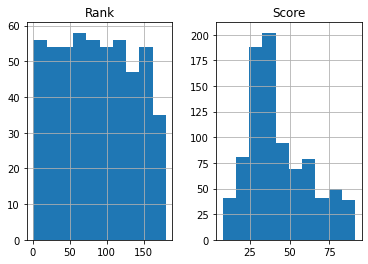

In [ ]:
cor_all.hist()

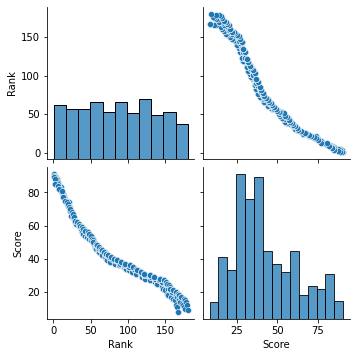

In [ ]:
sns.pairplot(cor_all)

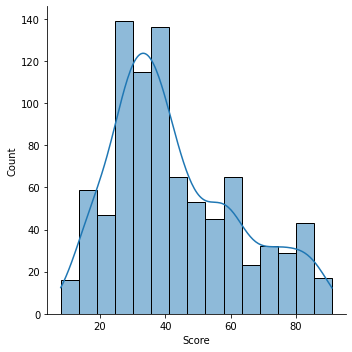

In [ ]:
sns.displot(cor_all['Score'], kde=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6d0ab96d0>,
      dtype=object)

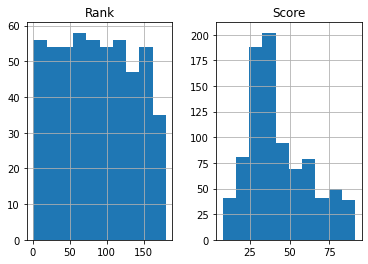

In [ ]:
cor_all.hist()

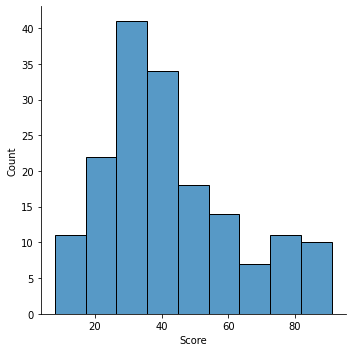

In [ ]:
sns.displot(cor15['Score'])

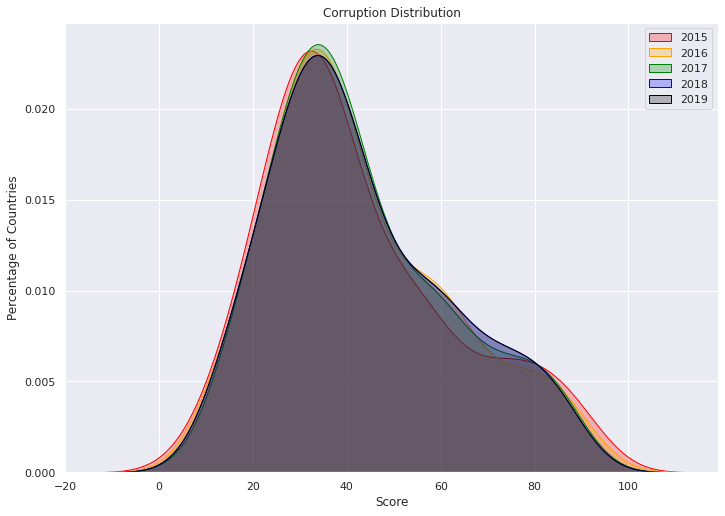

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Corruption Distribution")
plt.ylabel("Percentage of Countries")
plt.xlabel("Score")


sns.kdeplot(data = cor15['Score'], shade = True, color = 'red', label = '2015')
sns.kdeplot(data = cor16['Score'], shade = True, color = 'orange', label = '2016')
sns.kdeplot(data = cor17['Score'], shade = True, color = 'green', label = '2017')
sns.kdeplot(data = cor18['Score'], shade = True, color = 'blue', label = '2018')
sns.kdeplot(data = cor19['Score'], shade = True, color = 'black', label = '2019')
plt.legend()

Text(0.5, 0, 'Year')

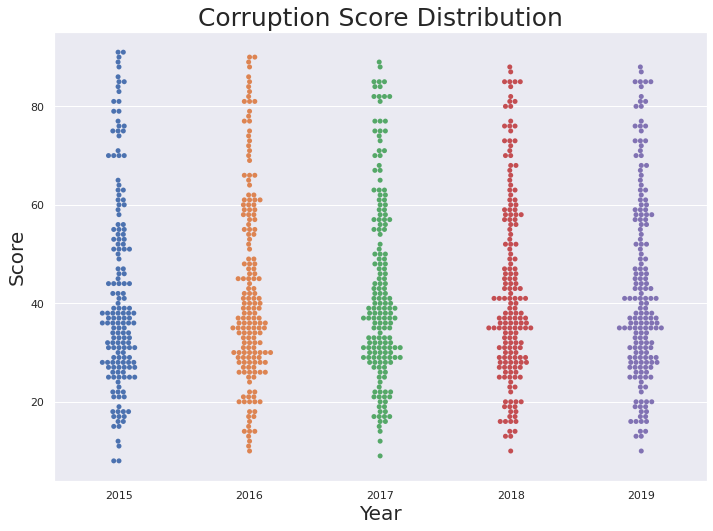

In [ ]:
plt.title("Corruption Score Distribution", fontsize = 25)
sns.swarmplot(x=cor_all['Year'], y=cor_all['Score'])
plt.ylabel('Score', fontsize=20)
plt.xlabel("Year", fontsize = 20)

In [ ]:
cor_all.isna().sum()

Rank       360
Country      0
Score        0
Year         0
dtype: int64

In [ ]:
cor_all.isnull().sum()

Rank       360
Country      0
Score        0
Year         0
dtype: int64

In [ ]:
cor_all.isnull().values.any()

True

In [ ]:
cor_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rank     524 non-null    Int64 
 1   Country  884 non-null    object
 2   Score    884 non-null    int64 
 3   Year     884 non-null    object
dtypes: Int64(1), int64(1), object(2)
memory usage: 28.6+ KB


In [ ]:
cor_all.head()

,Rank,Country,Score,Year
0,1,Denmark,91,2015
1,1,New Zealand,91,2015
2,3,Finland,90,2015
3,4,Sweden,89,2015
4,5,Norway,88,2015


In [ ]:
#calc_data = plot_data.astype(float).filled(np.nan)

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(cor_all, annot=True, cmap='coolwarm')
plt.title('Correlation plot')


TypeError: ignored

#SECOND DATA SET WITH GDP DATA 

In [ ]:
gdp = pd.read_csv('/content/drive/My Drive/hww_all.csv')

zasto mi je iscitan dataset bez zemlje?

In [ ]:
gdp.head()

,Country,Rank,Score,GDP,Family,Health,Freedom,Corruption,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


GOAL:
* TO COMPARE AND ADJUST 2 DF INto ONE BY THE NAME OF COUNTRY, then
* ADD COLUMN GDP FROM GDP DF into existed df
* algorithms apply in order to fnd out how gdp impacts to corruption
* why?


merge sa 2 kolone?!

In [ ]:
gdp.shape

(782, 10)

In [ ]:
new_df = gdp.merge(cor_all, how='inner', on=['Country', 'Year'])


In [ ]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     782 non-null    object 
 1   Rank        782 non-null    int64  
 2   Score       782 non-null    float64
 3   GDP         782 non-null    float64
 4   Family      782 non-null    float64
 5   Health      782 non-null    float64
 6   Freedom     782 non-null    float64
 7   Corruption  782 non-null    float64
 8   Generosity  782 non-null    float64
 9   Year        782 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 61.2+ KB


In [ ]:
cor_all['Year'] = pd.to_numeric(cor_all['Year'])

In [ ]:
new_df.head()

,Country,Rank_x,Score_x,GDP,Family,Health,Freedom,Corruption,Generosity,Year,Rank_y,Score_y
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,6,86
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,13,79
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,1,91
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,5,88
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,10,83


In [ ]:
#new_df.shape

(3673, 13)

In [ ]:
#new_df.head()

,Rank_x,Country,Score_x,Year_x,Rank_y,Score_y,GDP,Family,Health,Freedom,Corruption,Generosity,Year_y
0,1,Denmark,91,2015,3,7.527,1.325480,1.360580,0.874640,0.649380,0.48357,0.34139,2015
1,1,Denmark,91,2015,1,7.526,1.441780,1.163740,0.795040,0.579410,0.44453,0.36171,2016
2,1,Denmark,91,2015,2,7.522,1.482383,1.551122,0.792566,0.626007,0.40077,0.35528,2017
3,1,Denmark,91,2015,3,7.555,1.351000,1.590000,0.868000,0.683000,0.40800,0.28400,2018
4,1,Denmark,91,2015,2,7.600,1.383000,1.573000,0.996000,0.592000,0.41000,0.25200,2019
